In [ ]:
# https://www.kaggle.com/datasets/emmarex/plantdisease/code
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
def build_model(input_shape, num_classes, sparse=False):
    model = models.Sequential([
        layers.Conv2D(32, 3, activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    loss = 'sparse_categorical_crossentropy' if sparse else 'categorical_crossentropy'
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return model

In [14]:
print("📦 Training on Fashion MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train[..., None]/255.0, x_test[..., None]/255.0
model1 = build_model((28, 28, 1), 10, sparse=True)
history1 = model1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

📦 Training on Fashion MNIST...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7632 - loss: 0.6469 - val_accuracy: 0.8637 - val_loss: 0.3806
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8829 - loss: 0.3252 - val_accuracy: 0.8848 - val_loss: 0.3166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9016 - loss: 0.2728 - val_accuracy: 0.9004 - val_loss: 0.2720
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9137 - loss: 0.2361 - val_accuracy: 0.9054 - val_loss: 0.2608
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9233 - loss: 0.2094 - val_accuracy: 0.9091 - val_loss: 0.2524


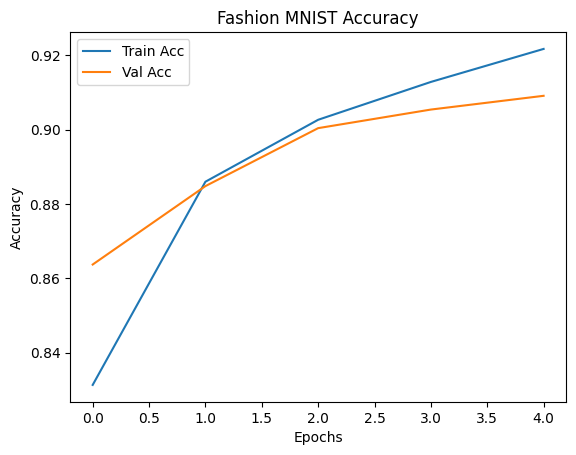

In [15]:
plt.plot(history1.history['accuracy'], label='Train Acc')
plt.plot(history1.history['val_accuracy'], label='Val Acc')
plt.title("Fashion MNIST Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


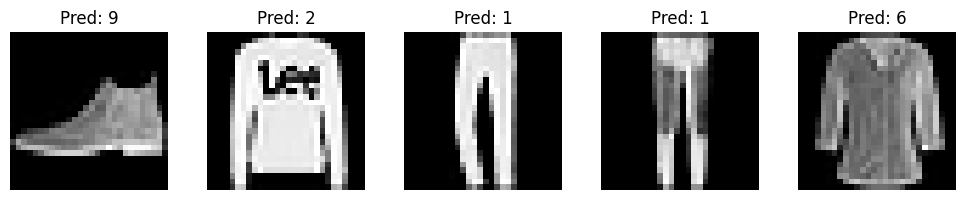

In [16]:
preds = model1.predict(x_test[:5])
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {preds[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
print("🌿 Training on Plant Disease Dataset...")
train_dir = r'D:\LP-5\DL Codes\train'  # Replace with your paths
val_dir = r'D:\LP-5\DL Codes\val'

🌿 Training on Plant Disease Dataset...


In [18]:
gen = ImageDataGenerator(rescale=1./255)
train_data = gen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')
val_data = gen.flow_from_directory(val_dir, target_size=(128, 128), batch_size=32, class_mode='categorical')


Found 2152 images belonging to 3 classes.
Found 2152 images belonging to 3 classes.


In [22]:

model2 = build_model((128, 128, 3), train_data.num_classes)
history2 = model2.fit(train_data, epochs=5, validation_data=val_data)

Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 27s 383ms/step - accuracy: 0.5776 - loss: 1.0726 - val_accuracy: 0.8806 - val_loss: 0.2970
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.8943 - loss: 0.2636 - val_accuracy: 0.9428 - val_loss: 0.1761
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.9481 - loss: 0.1522 - val_accuracy: 0.9020 - val_loss: 0.2247
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.9660 - loss: 0.1053 - val_accuracy: 0.9856 - val_loss: 0.0462
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.9855 - loss: 0.0571 - val_accuracy: 0.9907 - val_loss: 0.0409


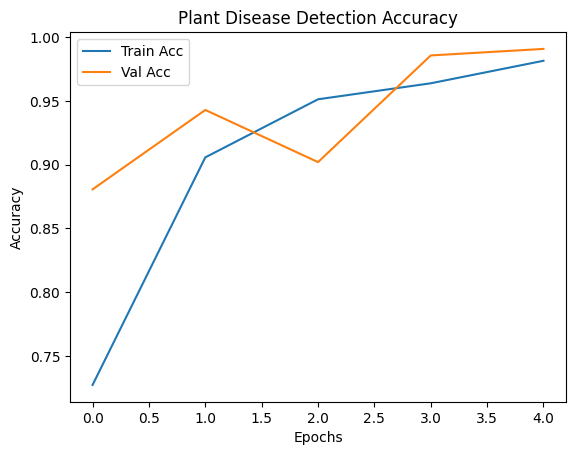

In [23]:
plt.plot(history2.history['accuracy'], label='Train Acc')
plt.plot(history2.history['val_accuracy'], label='Val Acc')
plt.title("Plant Disease Detection Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


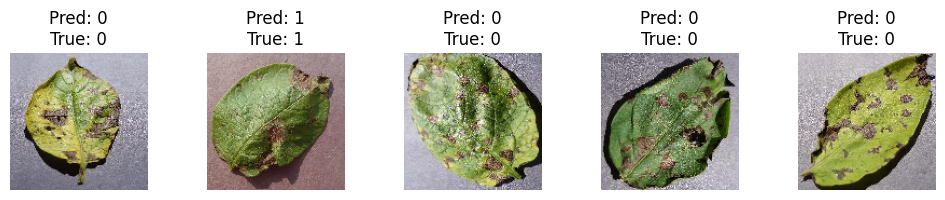

In [24]:
sample_images, sample_labels = next(val_data)  # Get a batch of validation data
preds = model2.predict(sample_images[:5])

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])  # Display image
    plt.title(f"Pred: {preds[i].argmax()}\nTrue: {sample_labels[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()